In [1]:
import sys

from math import *;

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

import numpy as np
import geom
import sonalleve
import transducers
import PBHEswig 
import argparse
import ablation_utils

import matplotlib.image as image
import matplotlib.pyplot as plt

import HookJeeves

os.chdir('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\path_optimization\\')

%matplotlib inline



In [2]:
import importlib
importlib.reload(HookJeeves)

<module 'HookJeeves' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy\\HookJeeves.py'>

In [75]:
del sys.modules['PBHE_CUDA']
del PBHE_CUDA

In [13]:
run CirclePathOptimization2.py -gpu -XR 4.0 -YR 4.0 -Nx 60 -Ny 60 -Nz 60 -w 2.0 -speed 0.3 -a 5.0 -I 1000

Proceeding with simulation...


In [7]:
type(np.complex)

type

In [10]:
np.complex

complex

In [19]:
(np.float64(1)*1j).real

0.0

In [24]:
qq=np.arange(0,4)*1j
pp=np.zeros(2,dtype=type(qq[0]))
type(pp[0])

numpy.complex128

In [ ]:
VolumeObjective_2(x0,verbose=True)

In [15]:
points,ntrn,nspt= getTraj(x0)

In [ ]:
speeds = np.arange(0.3,1.2, 0.1)

In [ ]:
roiExtra = np.logical_and( np.sqrt(gxp**2 + gyp**2) <= (1e-3*1.5*maxR_mm), np.abs(gzp-0.14) <= 0.015 )

In [ ]:
ObjectiveFunc(x0,show=True)

In [2]:
def getTraj(vec):
    return contstruct_circ_sonication_points(maxR_mm,turnspace_mm,140.,vec[0],vec[1],wait)
def plotTraj(vec):
    points,nt,numSon = contstruct_circ_sonication_points(maxR_mm,turnspace_mm,140.,vec[0],vec[1],vec[2])
    plt.plot(points[:,0], points[:,1], '*-')
    return points

In [ ]:
numTargetVox = np.sum(roiOnTarget)
def func2(param_vec, verbose=False, show=False ):
    run_simulation( param_vec, verbose=verbose, show=show)
    value = ( np.sum(CEM[roiExtra] >= 240.0) - numTargetVox )**2
    print (param_vec, " -> ", value)
    return value

In [ ]:
v1 = [1,2,3,4]
v2 = [1,2,3]
v3 = [1,2]

g1,g2,g3 = np.meshgrid(v1,v2,v3,indexing='ij')


In [ ]:
mm=list( map( lambda x,y,z: ("{%d, %d, %d}" % (x,y,z) ), g1.flatten(),g2.flatten(),g3.flatten())  )

In [ ]:
dat=np.reshape( mm, [len(v1), len(v2), len(v3)] )

In [ ]:
dat[:,:,0]

In [21]:
x0

array([  3.00000000e-01,   5.00000000e+00,   1.00000000e+07])

In [3]:
speeds = np.arange(0.1, 1.0, 0.1)
dwells = np.arange(3, 15, 1.0)
waits = np.arange(1.0,10.0, 1.0)
Is = np.arange(1000.0, 3000.0, 250)*1e4

e0,e1,e2 = np.meshgrid(speeds,dwells,waits,indexing='ij')

nsims_to_run = np.product(e0.shape)

In [ ]:
Fgrid = list( map( lambda sp,dw,wt: VolumeObjective_2(np.array([sp,dw,wt,2000.0]) ) , e0.flatten(), e1.flatten(), e2.flatten() )  )

In [ ]:
Fdat=np.reshape( Fgrid, [len(speeds), len(dwells), len(waits)] )

In [ ]:
np.min(Fdat)

In [4]:
FvsV = list( map( lambda sp: VolumeObjective_2(np.array([sp, 4.75, 1500.0e4]) ) , speeds )  )

[  1.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  27008809
[  2.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  4251844
[  3.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9778129
[  4.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  5.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  6.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  7.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  8.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  9.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900


In [5]:
FvsDw = list( map( lambda dw: VolumeObjective_2([0.3, dw, 1500.0e4] ) , dwells )  )

[0.3, 3.0, 15000000.0]  ->  9796900
[0.3, 4.0, 15000000.0]  ->  9796900
[0.3, 5.0, 15000000.0]  ->  9784384
[0.3, 6.0, 15000000.0]  ->  9734400
[0.3, 7.0, 15000000.0]  ->  9703225
[0.3, 8.0, 15000000.0]  ->  9696996
[0.3, 9.0, 15000000.0]  ->  9622404
[0.3, 10.0, 15000000.0]  ->  9616201
[0.3, 11.0, 15000000.0]  ->  9597604
[0.3, 12.0, 15000000.0]  ->  9672100
[0.3, 13.0, 15000000.0]  ->  9523396
[0.3, 14.0, 15000000.0]  ->  9603801


In [ ]:
VolumeObjective_2([0.3, 1.0, 1500e4] )

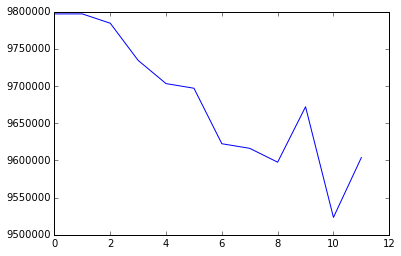

In [6]:
plt.plot(FvsDw)

In [1]:
plt.subplot(121)
plt.imshow(roiExtra[:,:,focplaneZpix])
plt.subplot(122)
plt.imshow(roiExtra[:,Ny/2,:])

NameError: name 'plt' is not defined

In [ ]:
plotTraj([1.1,7.0])
plotTraj([1.0,7.0])
plotTraj([0.5,7.0])
plotTraj([0.4,7.0])
plotTraj([0.3,7.0])

In [ ]:
plotTraj([0.5,10.0]);
plotTraj([10.0,0.5]);

In [36]:
PBHE_CUDA.ResetGPU()

In [9]:
x0=[3.0,1.0,2.0,2.5e7]

array([[ -1.41421356e+00,   1.41421356e+00,   1.40000000e+02],
       [ -1.41421356e+00,  -1.41421356e+00,   1.40000000e+02],
       [  1.41421356e+00,  -1.41421356e+00,   1.40000000e+02],
       [  1.41421356e+00,   1.41421356e+00,   1.40000000e+02],
       [  4.49106449e+00,   3.97873595e+00,   1.40000000e+02],
       [  2.12762932e+00,   5.61009746e+00,   1.40000000e+02],
       [ -7.23220082e-01,   5.95625324e+00,   1.40000000e+02],
       [ -3.40838848e+00,   4.93790320e+00,   1.40000000e+02],
       [ -5.31273615e+00,   2.78833903e+00,   1.40000000e+02],
       [ -6.00000000e+00,   3.39932334e-15,   1.40000000e+02],
       [ -5.31273615e+00,  -2.78833903e+00,   1.40000000e+02],
       [ -3.40838848e+00,  -4.93790320e+00,   1.40000000e+02],
       [ -7.23220082e-01,  -5.95625324e+00,   1.40000000e+02],
       [  2.12762932e+00,  -5.61009746e+00,   1.40000000e+02],
       [  4.49106449e+00,  -3.97873595e+00,   1.40000000e+02],
       [  5.82565090e+00,  -1.43589399e+00,   1.4000000

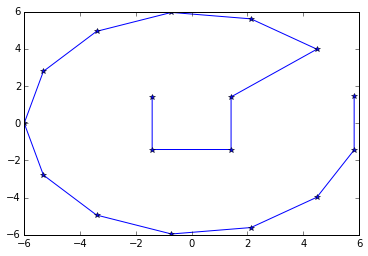

In [43]:
plotTraj([3.0, 1., 2.])

In [ ]:
PBHE_CUDA.Create_Global_GPU_Session32(*T.shape)

In [ ]:
PBHE_CUDA.ResetGPU()

In [16]:
#PBHE_CUDA.Create_Global_GPU_Session32(*T.shape)
VolumeObjective_4(x0,verbose=True,Npass=1)
#PBHE_CUDA.ResetGPU()

sonication 1
0%
sonication 2
0%
sonication 3
0%
sonication 4
0%
sonication 5
0%
sonication 6
0%
sonication 7
0%
sonication 8
0%
sonication 9
0%
sonication 10
0%
sonication 11
0%
sonication 12
0%
sonication 13
0%
sonication 14
0%
sonication 15
0%
sonication 16
0%
sonication 17
0%
[3.0, 1.0, 2.0, 25000000.0]  ->  19448100


19448100

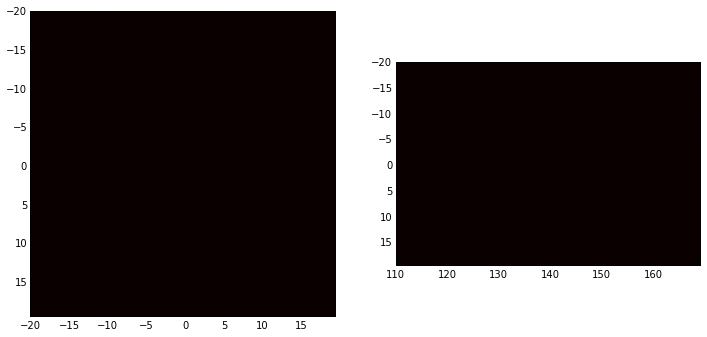

In [11]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(CEM[:,:,focplaneZpix],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*xrp[0], 1e3*xrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])
#plotTraj(x0[0:3])
plt.subplot(122)
plt.imshow(CEM[:,floor(Ny/2),:],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])

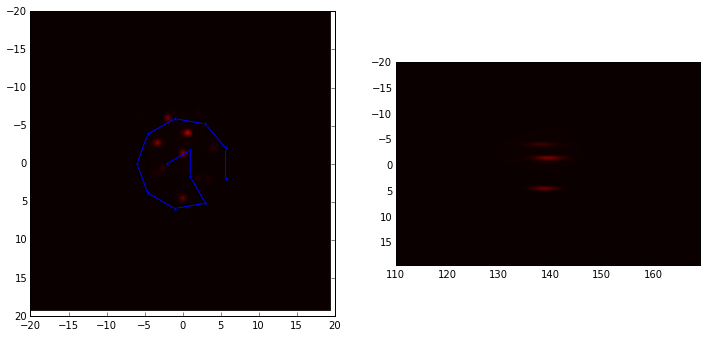

In [39]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(CEM[:,:,focplaneZpix],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*xrp[0], 1e3*xrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])
#plt.plot(points[:,0], points[:,1], '-*b')
plotTraj(x0)
plt.subplot(122)
plt.imshow(CEM[:,floor(Ny/2),:],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])

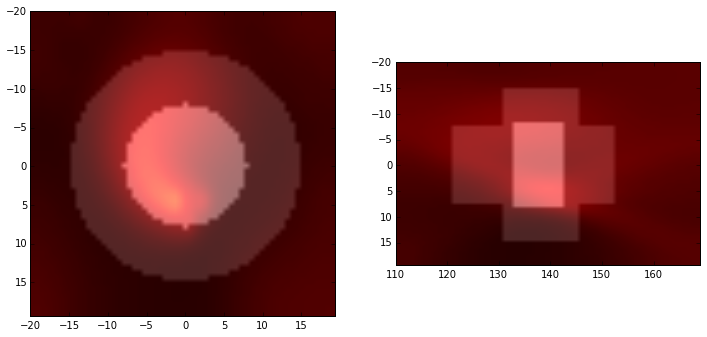

In [12]:
plt.figure(figsize=(12,9))
plt.subplot(121)
extXY=[1000*yrp[0],1000*yrp[-1],1000*xrp[-1],1000*xrp[0]]
plt.imshow((T[0][:,:,focplaneZpix]), extent=extXY, alpha=1.0,vmin=37,vmax=60, cmap=plt.cm.hot  )
plt.imshow((roiOnTarget[:,:,focplaneZpix]), extent=extXY, alpha=0.35,vmin=0,vmax=1, cmap=plt.cm.gray  )
plt.imshow((roiExtra[:,:,focplaneZpix]), extent=extXY, alpha=0.15,vmin=0,vmax=1, cmap=plt.cm.gray  )

#plt.plot(points[:,0], points[:,1], '-*b')
#plotTraj(x0)
plt.subplot(122)
extXZ=[1000*zrp[0],1000*zrp[-1],1000*xrp[-1],1000*xrp[0]]
plt.imshow((T[0][:,floor(Ny/2),:]),extent=extXZ, alpha=1.0,vmin=37,vmax=60, cmap=plt.cm.hot  )
plt.imshow((roiOnTarget[:,floor(Ny/2),:]),extent=extXZ, alpha=0.35,vmin=0,vmax=1, cmap=plt.cm.gray  )
plt.imshow((roiExtra[:,floor(Ny/2),:]),extent=extXZ, alpha=0.15,vmin=0,vmax=1, cmap=plt.cm.gray  )

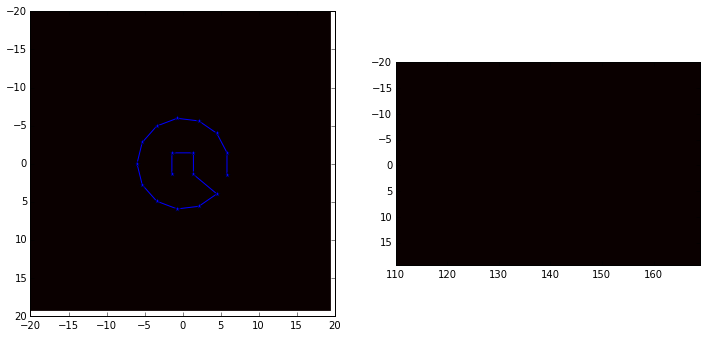

In [11]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(np.transpose(T[0][:,:,focplaneZpix]),vmin=37,vmax=60,cmap=plt.cm.hot, extent=[1e3*yrp[0], 1e3*yrp[-1], 1e3*xrp[-1], 1e3*xrp[0]])
#plt.plot(points[:,0], points[:,1], '-*b')
plotTraj([0.3,10,2.0])
plt.subplot(122)
plt.imshow((T[0][:,floor(Ny/2),:]),vmin=37,vmax=60,cmap=plt.cm.hot, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*xrp[-1], 1e3*xrp[0]])

In [2]:
run CirclePathOptimization4.py -gpu -XR 4.0 -YR 4.0 -Nt 100 -Nx 60 -Ny 60 -Nz 60 -w 2.0 -d 4.0 -speed 2.0 -a 2.0 -I 2000 

Proceeding with simulation...


In [3]:
PBHE_CUDA.Create_Global_GPU_Session32(*T.shape)

In [14]:
PBHE_CUDA.ResetGPU()

In [4]:
speeds = np.arange(0.6, 2.0, 0.1)
dwells = np.arange(2, 5.0, 0.5)
waits = np.arange(2.0,6.0, 2.0)
Is = np.arange(1000.0, 3000.0, 250)*1e4
Is = [2.0e7]
Npass=2

e0,e1,e2,e3 = np.meshgrid(speeds,dwells,waits,Is,indexing='ij')

nsims_to_run = np.product(e0.shape)
nsims_to_run

168

In [5]:
paramsFgrid = list( map( lambda sp,dw,wt,I: (np.array([sp,dw,wt,I]) ) , e0.flatten(), e1.flatten(), e2.flatten(), e3.flatten() ))

In [9]:
VolumeObjective_4(paramsFgrid[1], Npass=Npass)

[  6.00000000e-01   2.00000000e+00   4.00000000e+00   2.50000000e+07]  ->  19448100


19448100

In [8]:
Nt

20

In [6]:
Fgrid = list( map( lambda sp,dw,wt,I: VolumeObjective_4(np.array([sp,dw,wt,I]), Npass=Npass  ) , e0.flatten(), e1.flatten(), e2.flatten(), e3.flatten() )  )

[  6.00000000e-01   2.00000000e+00   2.00000000e+00   2.00000000e+07]  ->  13126129
[  6.00000000e-01   2.00000000e+00   4.00000000e+00   2.00000000e+07]  ->  19360000
[  6.00000000e-01   2.50000000e+00   2.00000000e+00   2.00000000e+07]  ->  8625969
[  6.00000000e-01   2.50000000e+00   4.00000000e+00   2.00000000e+07]  ->  18020025
[  6.00000000e-01   3.00000000e+00   2.00000000e+00   2.00000000e+07]  ->  4691556
[  6.00000000e-01   3.00000000e+00   4.00000000e+00   2.00000000e+07]  ->  14386849
[  6.00000000e-01   3.50000000e+00   2.00000000e+00   2.00000000e+07]  ->  3193369
[  6.00000000e-01   3.50000000e+00   4.00000000e+00   2.00000000e+07]  ->  11771761
[  6.00000000e-01   4.00000000e+00   2.00000000e+00   2.00000000e+07]  ->  2371600
[  6.00000000e-01   4.00000000e+00   4.00000000e+00   2.00000000e+07]  ->  9535744
[  6.00000000e-01   4.50000000e+00   2.00000000e+00   2.00000000e+07]  ->  683929
[  6.00000000e-01   4.50000000e+00   4.00000000e+00   2.00000000e+07]  ->  5244100


In [ ]:
plt.imshow(roiExtra[:,:,focplaneZpix])

In [77]:
e2[]

(2, 12, 4, 4)

In [26]:
params=np.reshape( paramsFgrid, [2,12,4,4 ,4] )

In [81]:
Fdat=np.reshape( Fgrid, e0.shape )

In [82]:
Fdat.shape

(13, 12, 4, 8)

#### Save the simulation

In [97]:
import importlib
import h5py

In [107]:
importlib.reload(ablation_utils)

<module 'ablation_utils' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\ablation_utils.py'>

In [128]:
#define a new file
#filename='C:\\Users\\Vandiver\\Data\\simulations\\param_grid\\LargeCuda_Obj4_old.h5'

f =h5py.File(filename, "w")

ablation_utils.write_xyz_simulation_coords(f, gxp=gxp, gyp=gyp,gzp=gzp,xrp=xrp,yrp=yrp,zrp=zrp,roiON=roiOnTarget,roiOFF=roiOffTarget,roiEXTRA=roiExtra)

names=["speed", "dwell", "wait", "Ispta0"]
units=["mm/s", "sec", "sec", "W/m^2"]
ablation_utils.write_parameter_space(f,Fdat,paramsFgrid, names, units=units, scoringfunc='VolumeObjective_4')

f.close()

----

In [87]:
ii=np.argmin(Fdat)

(e0mi,e1mi,e2mi,e3mi)=np.unravel_index(ii,Fdat.shape)
minTuple=(e0mi,e1mi,e2mi,e3mi)
minVec = [e0[minTuple], e1[minTuple], e2[minTuple], e3[minTuple]]

Fmin=np.min(Fdat)
Fmax=np.max(Fdat)


In [124]:
f.close()

In [89]:
minVec

[0.20000000000000001, 3.0, 2.0, 17500000.0]

In [85]:
VolumeObjective_4(np.array(minVec) )

[  2.00000000e-01   6.00000000e+00   8.00000000e+00   2.00000000e+07]  ->  1849


1849

In [110]:
f =h5py.File(filename, "r")


In [113]:
f['param_grid'].attrs['Ndims']

4

In [136]:
getTraj([0.3, 10.0, 2.0])
VolumeObjective_4(np.array([0.3, 10.0, 2.0, 2.5e7]),verbose=True )

sonication 1
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 2
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 3
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 4
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 5
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 6
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 7
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 8
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 9
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 10
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 11
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 12
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 13
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 14
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 15
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 16
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
sonication 17
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
[  3.00000000e-01   1.00000000e+01   2.00000000e+00   2.50000000e+07]  ->  132496


132496

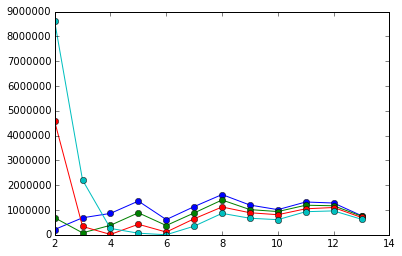

In [46]:
plt.plot(dwells, Fdat[0,:,:,2], '-o' )

In [81]:
dwells[0]+ Ddw*(len(dwells))

14.0

In [73]:
xc = [0.6, 6.0, 6.0, 2.5e7]
VolumeObjective_4(xc,verbose=True)

sonication 1
0%
83%
sonication 2
0%
83%
sonication 3
0%
83%
sonication 4
0%
83%
sonication 5
0%
83%
sonication 6
0%
83%
sonication 7
0%
83%
sonication 8
0%
83%
sonication 9
0%
83%
sonication 10
0%
83%
sonication 11
0%
83%
sonication 12
0%
83%
sonication 13
0%
83%
[0.6, 6.0, 6.0, 25000000.0]  ->  46457856


46457856

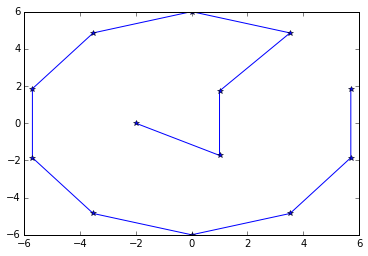

In [43]:
plotTraj(xc);

In [126]:
waits

array([ 2.,  4.,  6.,  8.])

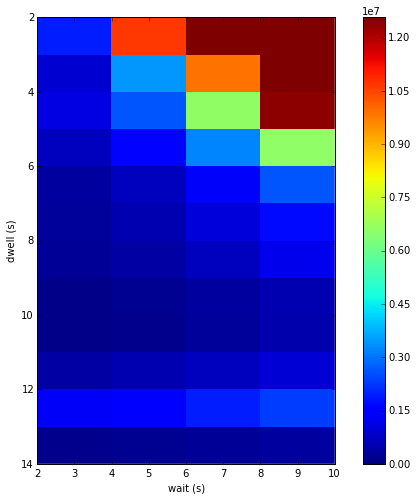

In [131]:

Dwait =waits[1]-waits[0]
Ddw =dwells[1]-dwells[0]
fig=plt.figure(figsize=(10,8))
plt.imshow( (Fdat[1,:,:,3]), vmin=Fmin,vmax=Fmin + 0.25*(Fmax-Fmin), interpolation='none',extent=[  waits[0],  waits[-1] + Dwait, dwells[-1]+Ddw, dwells[0]])
plt.xlabel('wait (s)')
plt.ylabel('dwell (s)')
plt.colorbar()

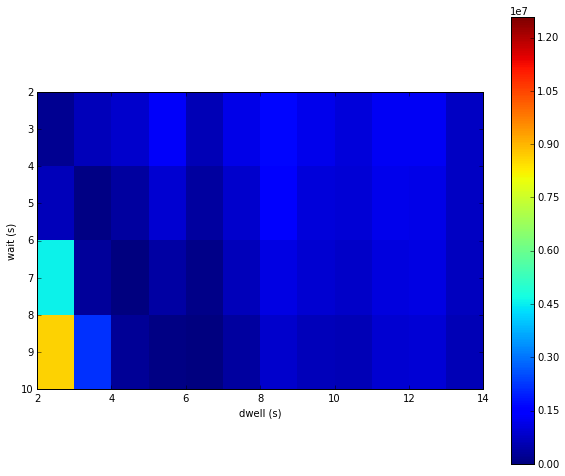

In [152]:
Dwait =waits[1]-waits[0]
Ddw =dwells[1]-dwells[0]
fig=plt.figure(figsize=(10,8))
plt.imshow(np.transpose(Fdat[0,:,:,2]), vmin=Fmin,vmax=Fmin + 0.25*(Fmax-Fmin), interpolation='none',extent=[dwells[0], dwells[-1]+Ddw,waits[-1] + Dwait, waits[0]])
plt.xlabel('dwell (s)')
plt.ylabel('wait (s)')
plt.colorbar()

In [108]:
x1list_dwell = np.arange(2.0, 13.0, 1.0)
x2list_wait = np.arange(0.5,4.5, 0.5)
g1,g2 = np.meshgrid(x1list_dwell,x2list_wait,indexing='ij')


fmat = list( map( lambda dw,wt: VolumeObjective_4(np.array([0.3,dw,wt,2000.0e4]) ) , g1.flatten(), g2.flatten() )  )

[  3.00000000e-01   2.00000000e+00   5.00000000e-01   2.00000000e+07]  ->  16362025
[  3.00000000e-01   2.00000000e+00   1.00000000e+00   2.00000000e+07]  ->  24010000
[  3.00000000e-01   2.00000000e+00   1.50000000e+00   2.00000000e+07]  ->  29322225
[  3.00000000e-01   2.00000000e+00   2.00000000e+00   2.00000000e+07]  ->  35652841
[  3.00000000e-01   2.00000000e+00   2.50000000e+00   2.00000000e+07]  ->  39225169
[  3.00000000e-01   2.00000000e+00   3.00000000e+00   2.00000000e+07]  ->  43007364
[  3.00000000e-01   2.00000000e+00   3.50000000e+00   2.00000000e+07]  ->  45185284
[  3.00000000e-01   2.00000000e+00   4.00000000e+00   2.00000000e+07]  ->  47375689
[  3.00000000e-01   3.00000000e+00   5.00000000e-01   2.00000000e+07]  ->  14853316
[  3.00000000e-01   3.00000000e+00   1.00000000e+00   2.00000000e+07]  ->  19633761
[  3.00000000e-01   3.00000000e+00   1.50000000e+00   2.00000000e+07]  ->  23001616
[  3.00000000e-01   3.00000000e+00   2.00000000e+00   2.00000000e+07]  ->  2

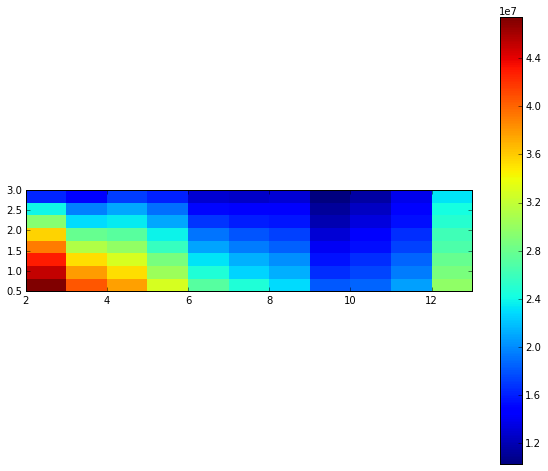

In [128]:
Ddw = x1list_dwell[1]-x1list_dwell[0]
Dwait= x2list_wait[1]-x1list_dwell[0]
fig=plt.figure(figsize=(10,8))
plt.imshow(np.transpose(np.reshape( fmat, g1.shape )), interpolation='none', extent=[x1list_dwell[0], x1list_dwell[-1]+Ddw, x2list_wait[0],  x2list_wait[-1] + Dwait])
plt.colorbar()

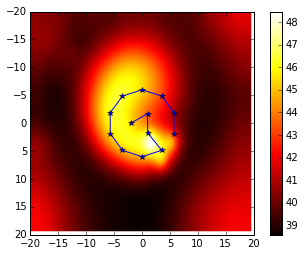

In [67]:
plt.imshow(T[1][:,:,focplaneZpix],cmap=plt.cm.hot,extent=1000*np.array([yrp[0],yrp[-1], xrp[-1],xrp[0]]))
plotTraj(xc);
plt.colorbar()

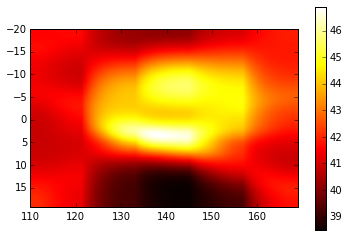

In [74]:
plt.imshow(T[1][:,floor(Ny/2),:],cmap=plt.cm.hot,extent=1000*np.array([zrp[0],zrp[-1],xrp[-1],xrp[0]]))
plt.colorbar()

In [71]:
focplaneZpix

29

In [72]:
flowBCs=0

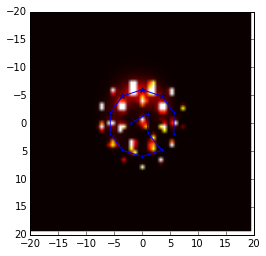

In [58]:
plt.imshow(CEM[:,:,focplaneZpix],vmin=0,vmax=240,cmap=plt.cm.hot,extent=1000*np.array([yrp[0],yrp[-1], xrp[-1],xrp[0]]))
plotTraj(xc);

C:\Users\Vandiver\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


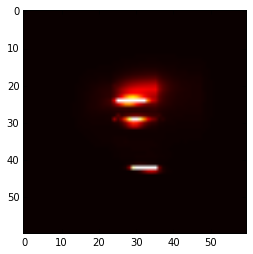

In [59]:
plt.imshow(CEM[:,Ny/2,:],vmin=0,vmax=240,cmap=plt.cm.hot)

array([[ -6.18033989e-01,   1.90211303e+00,   1.40000000e+02],
       [ -2.00000000e+00,   2.44929360e-16,   1.40000000e+02],
       [ -6.18033989e-01,  -1.90211303e+00,   1.40000000e+02],
       [  1.61803399e+00,  -1.17557050e+00,   1.40000000e+02],
       [  1.61803399e+00,   1.17557050e+00,   1.40000000e+02],
       [  4.69098889e+00,   3.74093881e+00,   1.40000000e+02],
       [  2.60330243e+00,   5.40581321e+00,   1.40000000e+02],
       [  3.67394040e-16,   6.00000000e+00,   1.40000000e+02],
       [ -2.60330243e+00,   5.40581321e+00,   1.40000000e+02],
       [ -4.69098889e+00,   3.74093881e+00,   1.40000000e+02],
       [ -5.84956747e+00,   1.33512560e+00,   1.40000000e+02],
       [ -5.84956747e+00,  -1.33512560e+00,   1.40000000e+02],
       [ -4.69098889e+00,  -3.74093881e+00,   1.40000000e+02],
       [ -2.60330243e+00,  -5.40581321e+00,   1.40000000e+02],
       [ -1.10218212e-15,  -6.00000000e+00,   1.40000000e+02],
       [  2.60330243e+00,  -5.40581321e+00,   1.4000000

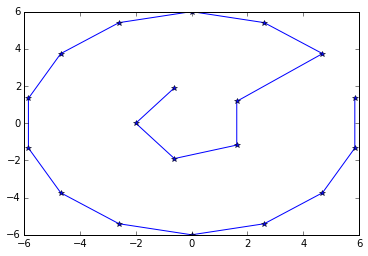

In [138]:
plotTraj([0.3, 9.25, 0.0])

C:\Users\Vandiver\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


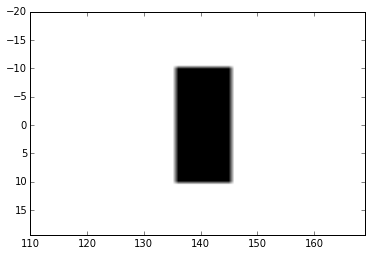

In [117]:
plt.imshow(roiOnTarget[:,Ny/2,:],cmap=plt.cm.gray_r, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])

C:\Users\Vandiver\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


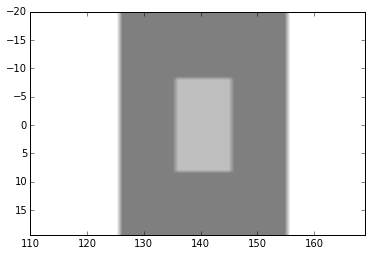

In [48]:
plt.imshow(1.0*np.array(roiOffTarget[:,Ny/2,:],dtype=int) + 0.5*np.array(roiOnTarget[:,Ny/2,:],dtype=int),vmin=0,vmax=2,cmap=plt.cm.gray_r, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])